In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as pl
import ot
import ot.plot

## OT

In [2]:
n = 50
a = 2
np.random.seed(0) 
ex_ = np.random.uniform(0,1,n)
ey_ = np.random.uniform(0,1,n)

x = ex_
y = a*x + ey_ -1

In [3]:
reg_inv = LinearRegression().fit(y.reshape(-1, 1),x.reshape(-1, 1) )
x_pred_inv = reg_inv.predict(y.reshape(-1, 1) )
x_residual = (x.reshape(-1, 1)  - x_pred_inv)
x_residual= x_residual.reshape(-1)


In [4]:
ey_u = np.random.uniform(0, 1, n)
ey_g = np.random.normal(0, 1, n)

In [5]:
xs_ = np.transpose(np.array([ex_,ey_]))
xs_u = np.transpose(np.array([ex_,ey_u]))
xs_g = np.transpose(np.array([ex_,ey_g]))
xt = np.transpose(np.array([x,y]))


# xs = np.transpose(np.array([y,noise]))
# xt = np.transpose(np.array([y,x]))

In [6]:
a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs_u, xt, metric='euclidean')
# M = ot.dist(xs, xt)
M /= M.max()

### Uniform distribution noise

the moving cost:  0.17834484532778933


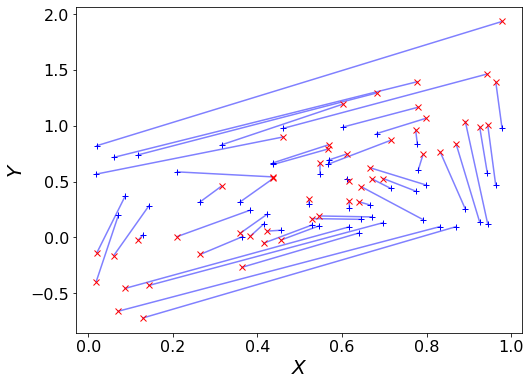

In [7]:
a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs_, xt, metric='euclidean')
# M = ot.dist(xs_, xt)
M /= M.max()

distance = ot.emd2(a, b, M)
print('the moving cost: ',distance)
G0 = ot.emd(a, b, M)

pl.figure(figsize=(8, 6))
# pl.imshow(G0, interpolation='nearest')
# pl.title('OT matrix G0')
# pl.figure(4)
ot.plot.plot2D_samples_mat(xs_, xt, G0, c=[.5, .5, 1])
pl.plot(xs_[:, 0], xs_[:, 1], '+b', label='Pseudo Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.xlabel('$X$',fontsize=20)
pl.ylabel('$Y$',fontsize=20)
pl.tick_params(axis='x', labelsize=16)
pl.tick_params(axis='y', labelsize=16)
# plt.savefig('ot.pdf')

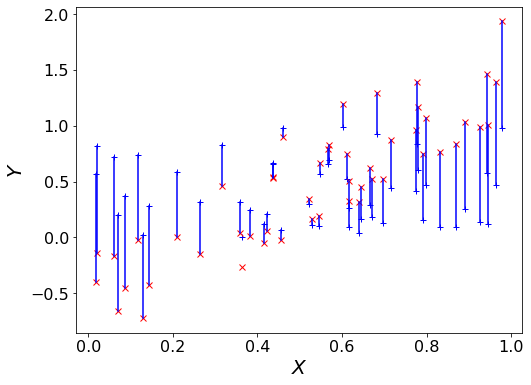

In [10]:
pl.figure(figsize=(8, 6))
pl.plot(xs_[:, 0], xs_[:, 1],'+b', label='Pseudo Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
for i in range(len(xs_[:, 0])-1):
    plt.plot((xs_[i,0], xt[i, 0]),(xs_[i, 1], xt[i, 1]),c='b')
pl.xlabel('$X$',fontsize=20)
pl.ylabel('$Y$',fontsize=20)
pl.tick_params(axis='x', labelsize=16)
pl.tick_params(axis='y', labelsize=16)

# plt.savefig('gt.pdf')